In [1]:
# Módulo para instalar librerías faltantes y necesarias para analizar el dataset y realizar la visualización.

# pip install plotly

# !pip install requests

# !pip install pandas requests plotly

# !pip install -U kaleido

# !pip install statsmodels

# !pip install prophet

# !pip install prophet

# !pip install tabpy


In [2]:
# Importación de bibliotecas que necesitamos para el análisis de datos.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
import requests
import matplotlib.pyplot as plt
# from fbprophet import prophet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import plotly.express as px

In [3]:
# Lectura y extracción del dataset.

# Ignore all warnings () 
warnings.filterwarnings('ignore') 

# Carga de los ficheros de datos, en nuestro caso están en .csv

crimes_df = pd.read_csv('C:/Users/le Roj/Desktop/Jupyter Notebook/Data/Crime Women India/CrimesOnWomenData.csv')
description_df = pd.read_csv('C:/Users/le Roj/Desktop/Jupyter Notebook/Data/Crime Women India/description.csv')

# Mostrar las primeras 5 filas de los ficheros.

print("CrimesOnWomenData.csv - 5 primeras  filas:")
print(crimes_df.head())

print("\nDescription.csv - 5 primeras filas:")
print(description_df.head())

CrimesOnWomenData.csv - 5 primeras  filas:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0

Description.csv - 5 primeras filas:
   Unnamed: 0 Column Names         Explanation
0           0        State               State
1           1         Year                Year
2           2         Rape   No. of Rape cases
3           3          K&A  Kidnap And Assault
4           4           DD        Dowry Deaths


In [4]:
print(crimes_df.columns)


Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')


In [5]:
# Elimina filas si hay NaN en las columnas específicas (por ejemplo, 'Casos de violación' y 'Secuestros y asaltos')
columns_to_check = ['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT']
crimes_df.dropna(subset=columns_to_check, inplace=True)


In [6]:
# Elimina columnas que contengan NaN
crimes_df.dropna(axis=1, inplace=True)


In [7]:
# Crear un diccionario para renombrar las columnas

column_names = {
    'Rape': 'Casos de violación',
    'K&A': 'Secuestros y asaltos',
    'DD': 'Muertes por la dote',
    'AoW': 'Asalto a mujeres',
    'AoM': 'Asalto a menores (niñas y adolescentes)',
    'DV': 'Violencia doméstica',
    'WT': 'Brujería',
    'State' : 'Estado',
    'Year' : 'Año',
}

# Renombrar las columnas en el DataFrame
crimes_df.rename(columns=column_names, inplace=True)

# Verificar los nombres de las columnas renombradas
print("\nRenamed Columns:")
print(crimes_df.columns)



Renamed Columns:
Index(['Unnamed: 0', 'Estado', 'Año', 'Casos de violación',
       'Secuestros y asaltos', 'Muertes por la dote', 'Asalto a mujeres',
       'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica',
       'Brujería'],
      dtype='object')


In [8]:
# Elimina filas si hay NaN en las columnas específicas
columns_to_check = ['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote', 
                    'Asalto a mujeres', 'Asalto a menores (niñas y adolescentes)', 
                    'Violencia doméstica', 'Brujería']
crimes_df.dropna(subset=columns_to_check, inplace=True)

# Opcional: Verificar el DataFrame después de eliminar NaN
print("\nDataFrame después de eliminar NaN:")
print(crimes_df.head())



DataFrame después de eliminar NaN:
   Unnamed: 0             Estado   Año  Casos de violación  \
0           0     ANDHRA PRADESH  2001                 871   
1           1  ARUNACHAL PRADESH  2001                  33   
2           2              ASSAM  2001                 817   
3           3              BIHAR  2001                 888   
4           4       CHHATTISGARH  2001                 959   

   Secuestros y asaltos  Muertes por la dote  Asalto a mujeres  \
0                   765                  420              3544   
1                    55                    0                78   
2                  1070                   59               850   
3                   518                  859               562   
4                   171                   70              1763   

   Asalto a menores (niñas y adolescentes)  Violencia doméstica  Brujería  
0                                     2271                 5791         7  
1                                        3

In [9]:
# Quitamos las columnas que no utilizaremos en el análisis de datos y su visualización. 

crimes_df_cleaned = crimes_df.drop(columns=['Unnamed: 0'])
crimes_df_cleaned['Estado'] = crimes_df_cleaned['Estado'].str.upper()

# Verificamos la DataFrame ya limpia.

print("\nCleaned Dataset Columns:")
print(crimes_df_cleaned.columns)
print("\nFirst 5 Rows of the Cleaned Dataset:")
print(crimes_df_cleaned.head())


Cleaned Dataset Columns:
Index(['Estado', 'Año', 'Casos de violación', 'Secuestros y asaltos',
       'Muertes por la dote', 'Asalto a mujeres',
       'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica',
       'Brujería'],
      dtype='object')

First 5 Rows of the Cleaned Dataset:
              Estado   Año  Casos de violación  Secuestros y asaltos  \
0     ANDHRA PRADESH  2001                 871                   765   
1  ARUNACHAL PRADESH  2001                  33                    55   
2              ASSAM  2001                 817                  1070   
3              BIHAR  2001                 888                   518   
4       CHHATTISGARH  2001                 959                   171   

   Muertes por la dote  Asalto a mujeres  \
0                  420              3544   
1                    0                78   
2                   59               850   
3                  859               562   
4                   70              1763   

   

In [10]:
# Instalamos otra librería para visualizaciones.

# import plotly.express as px

# Crear un heatmap (mapa de calor) usando Plotly.

heatmap_data = crimes_df_cleaned.pivot_table(
    values='Casos de violación', 
    index='Estado', 
    columns='Año', 
    aggfunc='sum', 
    fill_value=0
)

# Crear el heatmap (mapa de calor) interactivo con título.

fig = px.imshow(
    heatmap_data,
    labels=dict(x="Año", y="Estado", color="Casos de violación"),
    x=heatmap_data.columns,
    y=heatmap_data.index,
    color_continuous_scale="YlGnBu",
    aspect="auto",
    title="Casos de violación por Estado y año (2001-2021)" 
)

# Mostrar el heatmap (mapa de calor).

fig.show()


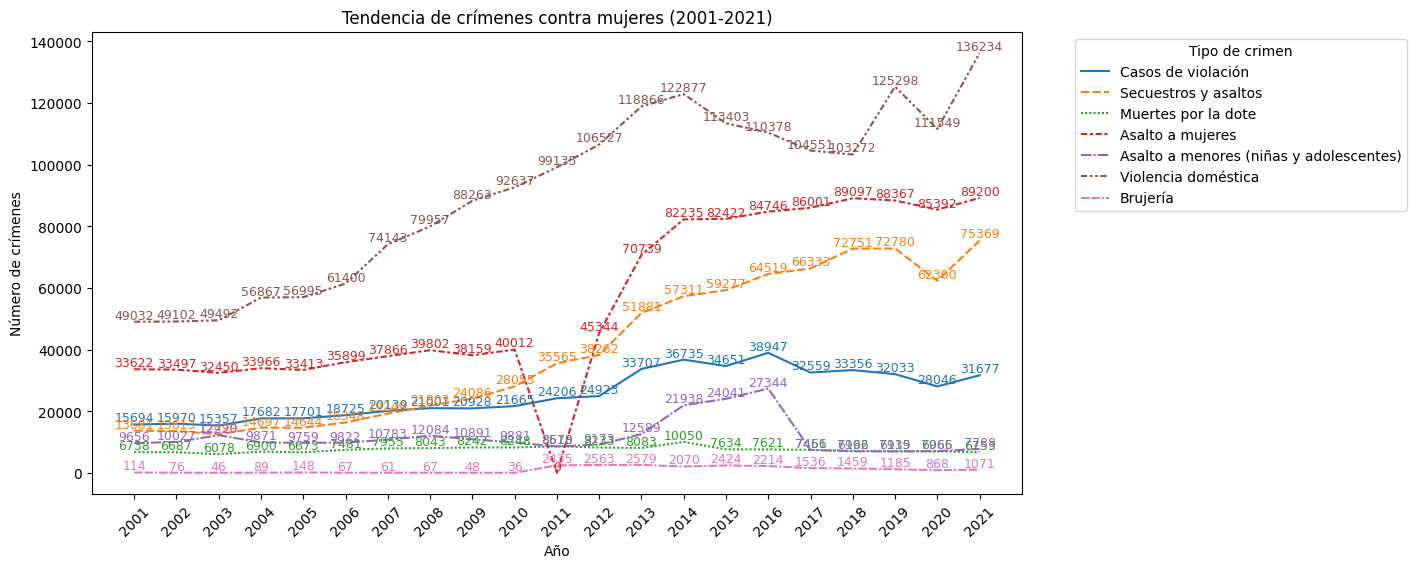

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Agrupar por año y sumar todos los tipos de crímenes.

crime_trend = crimes_df_cleaned.groupby('Año').sum()

# Tendencia de crímenes contra mujeres (2001-2021).

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=crime_trend)

# Ajustar el título y etiquetas
plt.title('Tendencia de crímenes contra mujeres (2001-2021)')
plt.xlabel('Año')
plt.ylabel('Número de crímenes')

# Establecer los valores del eje X como enteros.

years = crime_trend.index
plt.xticks(ticks=range(min(years), max(years) + 1), rotation=45)

# Mostrar la leyenda.

plt.legend(title='Tipo de crimen', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir anotaciones a cada punto en el gráfico.

for line in ax.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        ax.text(x, y, f'{int(y)}', color=line.get_color(), fontsize=9, ha='center', va='bottom')

# Mostrar el gráfico.

plt.show()


<Figure size 1200x600 with 0 Axes>

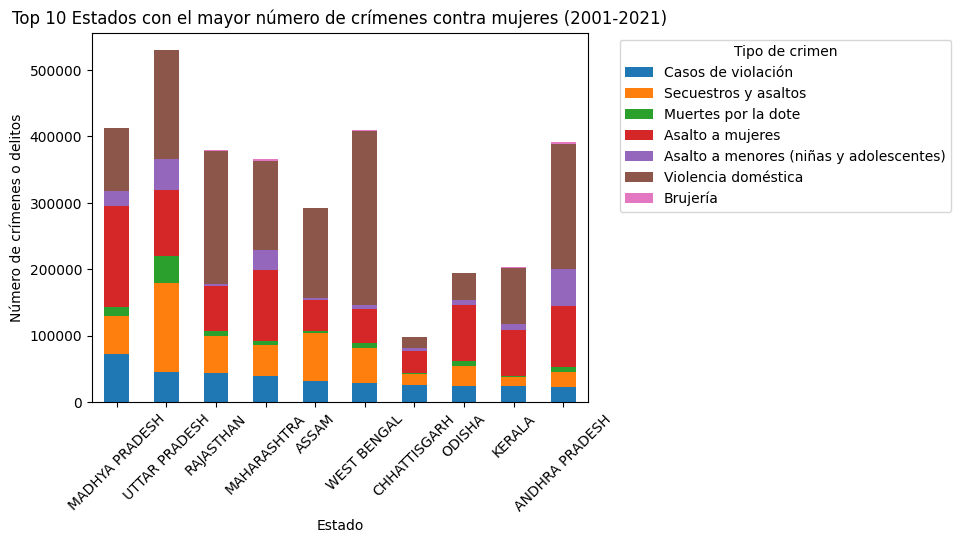

In [12]:
#crimes_df_cleaned = crimes_df.copy()  # Realiza más limpieza si es necesario

# Eliminar la columna 'Año' para la visualización.

crimes_df_cleaned_eda = crimes_df_cleaned.drop(columns=['Año'])

# Total de crímenes por Estado.

state_crime = crimes_df_cleaned_eda.groupby('Estado').sum().sort_values(by='Casos de violación', ascending=False)

# Top 10 Estados con el mayor número de crímenes o delitos.

top_states = state_crime.head(10)

# Graficar.

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', stacked=True)
plt.title('Top 10 Estados con el mayor número de crímenes contra mujeres (2001-2021)')
plt.xlabel('Estado')
plt.ylabel('Número de crímenes o delitos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de crimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
# Eliminar la columna 'Año' para preparar el DataFrame
crimes_df_cleaned_eda = crimes_df_cleaned.drop(columns=['Año'])

# Calcular el promedio de cada tipo de crimen para los 10 estados con el mayor número total de crímenes
top_states_mean_crime = crimes_df_cleaned_eda.groupby('Estado').mean().sort_values(by='Casos de violación', ascending=False).head(10).reset_index()

# Derretir el DataFrame para tener una columna para el tipo de crimen
top_states_mean_crime_melted = top_states_mean_crime.melt(id_vars=['Estado'], var_name='Tipo de crimen', value_name='Número promedio')

# Crear el gráfico de barras interactivo
fig = px.bar(
    top_states_mean_crime_melted,
    x='Estado',
    y='Número promedio',
    color='Tipo de crimen',
    title='Número promedio de diferentes tipos de crímenes en los 10 Estados con mayor incidencia',
    labels={'Número promedio': 'Número promedio de crímenes o delitos', 'Tipo de crimen': 'Tipo de crimen'},
    text='Número promedio',  # Muestra el valor solo cuando se pasa el cursor sobre la barra
)

# Ajustar el diseño del gráfico
fig.update_layout(
    xaxis_title='Estado',
    yaxis_title='Número promedio de crímenes o delitos',
    xaxis_tickangle=-45,
    barmode='group'  # Si prefieres un gráfico de barras agrupadas
)

# Configurar el formato de texto para mostrar enteros y hacer los valores interactivos
fig.update_traces(
    texttemplate='%{text:.0f}',  # Formato de los textos como enteros
    textposition='none',  # No mostrar los textos fijos en el gráfico
    hovertemplate='<b>%{x}</b><br>%{y:.0f}<br>%{customdata}<extra></extra>',  # Texto que aparece al pasar el cursor
    customdata=top_states_mean_crime_melted[['Tipo de crimen']].astype(str),  # Incluir el tipo de crimen en customdata
)

# Mostrar el gráfico
fig.show()

In [14]:
print(crime_trend.columns)


Index(['Estado', 'Casos de violación', 'Secuestros y asaltos',
       'Muertes por la dote', 'Asalto a mujeres',
       'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica',
       'Brujería'],
      dtype='object')


In [15]:
# Selecciona solo las columnas numéricas
numeric_columns = crime_trend.select_dtypes(include=['number']).columns

# Agrega una columna para el total de crímenes sumando solo las columnas numéricas
crime_trend['Total Crímenes'] = crime_trend[numeric_columns].sum(axis=1)


In [16]:
crime_trend.index = crime_trend.index.astype(int)


In [17]:
# import plotly.graph_objects as go

if 'Total de crímenes o delitos' not in crime_trend.columns:
    # Selecciona solo las columnas numéricas
    numeric_columns = crime_trend.select_dtypes(include=['number']).columns
    
    # Agrega una columna para el total de crímenes sumando solo las columnas numéricas
    crime_trend['Total de crímenes o delitos'] = crime_trend[numeric_columns].sum(axis=1)

# Asegúrate de que el índice sea entero
crime_trend.index = crime_trend.index.astype(int)

# Crear el gráfico de líneas interactivo
fig = go.Figure()

# Añadir una línea para el total de crímenes
fig.add_trace(go.Scatter(
    x=crime_trend.index,
    y=crime_trend['Total de crímenes o delitos'],
    mode='lines+markers',
    name='Total de crímenes o delitos',
    hoverinfo='x+y',  # Solo mostrar el año y el total de crímenes en el hover
))

# Ajustar el diseño del gráfico
fig.update_layout(
    title='Tendencia de crímenes contra mujeres en India (2001-2021)',
    xaxis_title='Año',
    yaxis_title='Número total de crímenes o delitos',
    xaxis=dict(
        tickmode='linear',
        dtick=1  # Mostrar los ticks para cada año
    ),
    yaxis=dict(
        tickformat=',d'  # Formato de números enteros en el eje Y
    ),
    hovermode='x unified'  # Mostrar información del hover de forma unificada
)

# Mostrar el gráfico
fig.show()


In [18]:
# Verifica si 'Total de crímenes o delitos' ya existe
if 'Total de crímenes o delitos' not in crime_trend.columns:
    # Selecciona solo las columnas numéricas
    numeric_columns = crime_trend.select_dtypes(include=['number']).columns
    
    # Agrega una columna para el total de crímenes sumando solo las columnas numéricas
    crime_trend['Total de crímenes o delitos'] = crime_trend[numeric_columns].sum(axis=1)

# Asegúrate de que el índice sea entero
crime_trend.index = crime_trend.index.astype(int)

# Convertir el índice a una columna para la regresión
crime_trend_reset = crime_trend.reset_index()
crime_trend_reset.rename(columns={'index': 'Año'}, inplace=True)

# Preparar los datos para la regresión lineal
X = crime_trend_reset[['Año']].values.reshape(-1, 1)  # Año como variable independiente
y = crime_trend_reset['Total de crímenes o delitos'].values  # Total de crímenes como variable dependiente

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predicciones
crime_trend_reset['Predicción'] = model.predict(X)

# Coeficiente de la regresión
coef = model.coef_[0]
intercept = model.intercept_

# Crear el gráfico
fig = go.Figure()

# Línea de los datos
fig.add_trace(go.Scatter(
    x=crime_trend_reset['Año'],
    y=crime_trend_reset['Total de crímenes o delitos'],
    mode='lines+markers',
    name='Datos Reales',
    hoverinfo='x+y',
))

# Línea de la regresión
fig.add_trace(go.Scatter(
    x=crime_trend_reset['Año'],
    y=crime_trend_reset['Predicción'],
    mode='lines',
    name=f'Regresión Lineal\nPendiente: {coef:.2f}, Intersección: {intercept:.2f}',
    line=dict(dash='dash'),
    hoverinfo='x+y',
))

# Ajustar el diseño del gráfico
fig.update_layout(
    title='Tendencia de crímenes contra mujeres en India (2001-2021)',
    xaxis_title='Año',
    yaxis_title='Número total de crímenes o delitos',
    xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    yaxis=dict(
        tickformat=',d'
    ),
    hovermode='x unified'
)

# Mostrar el gráfico
fig.show()

# Imprimir el coeficiente de la regresión
print(f'Pendiente de la regresión: {coef:.2f}')
print(f'Intersección de la regresión: {intercept:.2f}')

# Evaluar la validez de la hipótesis
if coef > 0:
    print("La hipótesis es válida: La tasa de crímenes ha aumentado.")
elif coef < 0:
    print("La hipótesis es inválida: La tasa de crímenes ha disminuido.")
else:
    print("La hipótesis no puede ser validada: No hay cambio en la tasa de crímenes.")

# Análisis detallado de los últimos cuatro años
recent_years = crime_trend_reset[crime_trend_reset['Año'] >= crime_trend_reset['Año'].max() - 3]
recent_years_summary = recent_years[['Año', 'Total de crímenes o delitos', 'Predicción']]

print("\nAnálisis de los últimos cuatro años:")
print(recent_years_summary.to_string(index=False))

# Calcular el cambio porcentual, ignorando el primer año donde no hay comparación previa
recent_years['Cambio porcentual'] = recent_years['Total de crímenes o delitos'].pct_change() * 100

# Filtrar filas con cambio porcentual calculado
recent_years_filtered = recent_years.dropna(subset=['Cambio porcentual'])

print("\nCambio porcentual en los últimos cuatro años (sin 'NaN'):")
print(recent_years_filtered[['Año', 'Cambio porcentual']].to_string(index=False))

# Análisis de la tendencia completa
print("\nAnálisis general de la tendencia (2001-2021):")
total_crimes_start = crime_trend_reset.iloc[0]['Total de crímenes o delitos']
total_crimes_end = crime_trend_reset.iloc[-1]['Total de crímenes o delitos']
total_crimes_change = total_crimes_end - total_crimes_start
total_crimes_change_pct = (total_crimes_change / total_crimes_start) * 100

print(f'Número total de crímenes en 2001: {total_crimes_start:.2f}')
print(f'Número total de crímenes en 2021: {total_crimes_end:.2f}')
print(f'Cambio absoluto en el periodo: {total_crimes_change:.2f}')
print(f'Cambio porcentual en el periodo: {total_crimes_change_pct:.2f}%')

Pendiente de la regresión: 25617.89
Intersección de la regresión: -51053986.05
La hipótesis es válida: La tasa de crímenes ha aumentado.

Análisis de los últimos cuatro años:
 Año  Total de crímenes o delitos    Predicción
2018                       628186 642917.807792
2019                       667434 668535.698701
2020                       604372 694153.589610
2021                       696184 719771.480519

Cambio porcentual en los últimos cuatro años (sin 'NaN'):
 Año  Cambio porcentual
2019           6.247831
2020          -9.448425
2021          15.191306

Análisis general de la tendencia (2001-2021):
Número total de crímenes en 2001: 257074.00
Número total de crímenes en 2021: 696184.00
Cambio absoluto en el periodo: 439110.00
Cambio porcentual en el periodo: 170.81%


In [19]:

# Supongamos que tienes el DataFrame original en crimes_df_cleaned
# Primero, asegurémonos de que el DataFrame contiene la columna 'Año'
if 'Año' not in crimes_df_cleaned.columns:
    print("La columna 'Año' no está en el DataFrame.")
else:
    # Crear una columna total de crímenes
    crimes_df_cleaned['Total de crímenes'] = crimes_df_cleaned[['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote', 'Asalto a mujeres', 'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica', 'Brujería']].sum(axis=1)

    # Agrupar por estado y calcular el total de crímenes por estado
    total_crimes_by_state = crimes_df_cleaned.groupby('Estado')['Total de crímenes'].sum().reset_index()
    
    # Obtener los 10 estados con mayor incidencia
    top_10_states = total_crimes_by_state.sort_values(by='Total de crímenes', ascending=False).head(10)['Estado'].tolist()

    # Filtrar los datos para los 10 estados con mayor incidencia
    top_10_crimes_filtered = crimes_df_cleaned[crimes_df_cleaned['Estado'].isin(top_10_states)]

    # Agrupar por estado y año
    regional_trend_top_10 = top_10_crimes_filtered.groupby(['Estado', 'Año']).sum().reset_index()

    # Verificar el DataFrame
    print(regional_trend_top_10.head())


           Estado   Año  Casos de violación  Secuestros y asaltos  \
0  ANDHRA PRADESH  2001                 871                   765   
1  ANDHRA PRADESH  2002                1002                   854   
2  ANDHRA PRADESH  2003                 946                   931   
3  ANDHRA PRADESH  2004                1016                  1030   
4  ANDHRA PRADESH  2005                 935                   995   

   Muertes por la dote  Asalto a mujeres  \
0                  420              3544   
1                  449              3799   
2                  466              4128   
3                  512              3817   
4                  443              3595   

   Asalto a menores (niñas y adolescentes)  Violencia doméstica  Brujería  \
0                                     2271                 5791         7   
1                                     2024                 7018         0   
2                                     2286                 8167         5   
3           

In [20]:
# Crear el gráfico de líneas para los 10 estados con mayor incidencia
fig = px.line(
    regional_trend_top_10,
    x='Año',
    y='Total de crímenes',
    color='Estado',
    title='Tendencias de crímenes en los 10 estados con mayor incidencia en India (2001-2021)',
    labels={'Año': 'Año', 'Total de crímenes': 'Número total de crímenes', 'Estado': 'Estado'}
)

# Ajustar el diseño del gráfico
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Número total de crímenes',
    xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    yaxis=dict(
        tickformat=',d'
    ),
    hovermode='x unified'
)

# Mostrar el gráfico
fig.show()


In [21]:
# Agrupamos los datos por estado y calculamos la suma total de cada tipo de crimen por estado.
crimes_by_state = crimes_df_cleaned.groupby('Estado').sum().reset_index()

# Crea un gráfico de barras interactivo usando Plotly
fig = px.bar(crimes_by_state, 
             x='Estado', 
             y='Casos de violación', 
             title='Número total de casos de violación por estado (2001-2021)', 
             labels={'Casos de violación': 'Número de casos'},
             text='Casos de violación')  # Añade el valor sobre las barras

# Configura el diseño para mostrar los valores en el gráfico
fig.update_traces(texttemplate='%{text}', textposition='outside', cliponaxis=False)

# Ajusta el diseño del gráfico
fig.update_layout(
    xaxis_title='Estado',
    yaxis_title='Número de casos',
    xaxis_tickangle=-90
)

# Muestra el gráfico
fig.show()

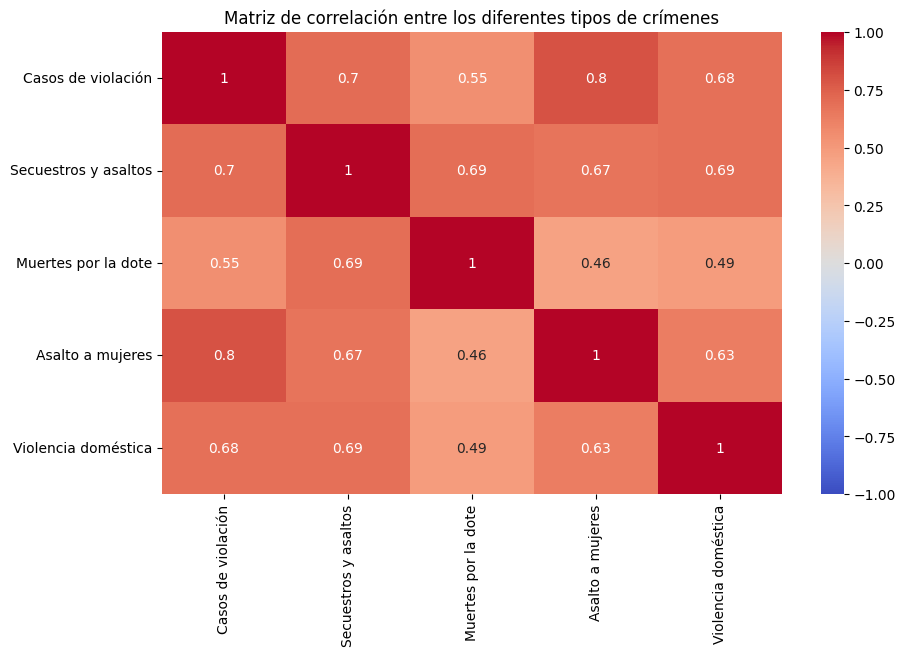

In [22]:
# Calculamos la correlación entre los diferentes tipos de crímenes.
correlation_matrix = crimes_df_cleaned[['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote', 'Asalto a mujeres', 'Violencia doméstica']].corr()

# Visualizamos la matriz de correlación usando un mapa de calor.
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre los diferentes tipos de crímenes')
plt.show()


Matriz de correlación:
                                         Casos de violación  \
Casos de violación                                 1.000000   
Secuestros y asaltos                               0.926402   
Muertes por la dote                                0.385711   
Asalto a mujeres                                   0.843228   
Asalto a menores (niñas y adolescentes)            0.460076   
Violencia doméstica                                0.892958   
Brujería                                           0.790396   
Total de crímenes o delitos                        0.964727   

                                         Secuestros y asaltos  \
Casos de violación                                   0.926402   
Secuestros y asaltos                                 1.000000   
Muertes por la dote                                  0.155775   
Asalto a mujeres                                     0.890649   
Asalto a menores (niñas y adolescentes)              0.162037   
Violencia doméstica

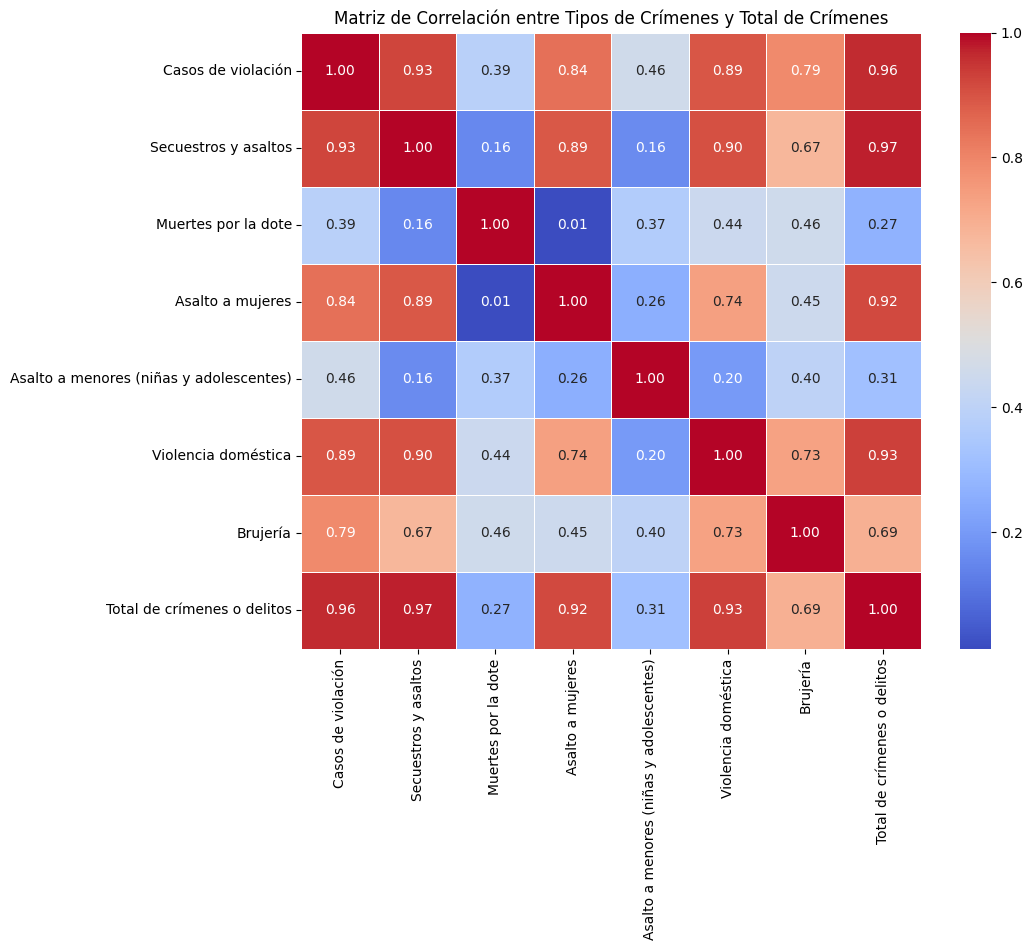


Modelo para Casos de violación:
Pendiente: 0.04
Intersección: 4980.44

Modelo para Secuestros y asaltos:
Pendiente: 0.14
Intersección: -23430.27

Modelo para Muertes por la dote:
Pendiente: 0.00
Intersección: 6899.87

Modelo para Asalto a mujeres:
Pendiente: 0.15
Intersección: -13214.28

Modelo para Asalto a menores (niñas y adolescentes):
Pendiente: 0.01
Intersección: 6768.96

Modelo para Violencia doméstica:
Pendiente: 0.16
Intersección: 18926.60

Modelo para Brujería:
Pendiente: 0.00
Intersección: -931.33


In [23]:
# Calcular las correlaciones entre los tipos de crímenes y el total de crímenes
correlation_matrix = crime_trend[['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote', 
                                  'Asalto a mujeres', 'Asalto a menores (niñas y adolescentes)', 
                                  'Violencia doméstica', 'Brujería', 'Total de crímenes o delitos']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Tipos de Crímenes y Total de Crímenes')
plt.show()

# Crear gráficos de dispersión para ver la relación entre cada par de variables
fig = go.Figure()

# Añadir gráficos de dispersión para cada par de crímenes
for crime_type in ['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote', 
                   'Asalto a mujeres', 'Asalto a menores (niñas y adolescentes)', 
                   'Violencia doméstica', 'Brujería']:
    fig.add_trace(go.Scatter(
        x=crime_trend['Total de crímenes o delitos'],
        y=crime_trend[crime_type],
        mode='markers',
        name=crime_type,
        hoverinfo='x+y',
        marker=dict(size=8)
    ))

# Ajustar el diseño del gráfico
fig.update_layout(
    title='Relación entre total de crímenes o deliots y los diferentes tipos de crímenes o delitos',
    xaxis_title='Número total de crímenes o delitos',
    yaxis_title='Número de casos de crímenes',
    hovermode='x unified'
)

# Mostrar el gráfico
fig.show()

# Calcular las regresiones para cada tipo de crimen respecto al total
# Crear un diccionario para almacenar los modelos de regresión
models = {}

for crime_type in ['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote', 
                   'Asalto a mujeres', 'Asalto a menores (niñas y adolescentes)', 
                   'Violencia doméstica', 'Brujería']:
    X = crime_trend[['Total de crímenes o delitos']].values.reshape(-1, 1)
    y = crime_trend[crime_type].values
    model = LinearRegression()
    model.fit(X, y)
    models[crime_type] = model

    # Mostrar el coeficiente y la intersección de la regresión
    coef = model.coef_[0]
    intercept = model.intercept_
    print(f'\nModelo para {crime_type}:')
    print(f'Pendiente: {coef:.2f}')
    print(f'Intersección: {intercept:.2f}')


In [24]:
# Filtrar datos para el año 2021 y sumar los valores
crime_2021 = crimes_df[crimes_df['Año'] == 2021].sum()

# Crear el gráfico de pastel con Plotly
fig = go.Figure(data=[go.Pie(
    labels=['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote', 
            'Asalto a mujeres', 'Asalto a menores (niñas y adolescentes)', 
            'Violencia doméstica', 'Brujería'],
    values=[crime_2021['Casos de violación'], crime_2021['Secuestros y asaltos'], 
            crime_2021['Muertes por la dote'], crime_2021['Asalto a mujeres'], 
            crime_2021['Asalto a menores (niñas y adolescentes)'], 
            crime_2021['Violencia doméstica'], crime_2021['Brujería']],
    textinfo='label+value',  # Muestra la etiqueta y el valor dentro del gráfico
    textposition='outside',  # Mueve las etiquetas fuera del gráfico
    pull=[0.1]*7,  # Aumenta el espacio entre las porciones para mejorar la visibilidad
    marker=dict(
        line=dict(color='black', width=1)  # Agrega una línea negra alrededor de las porciones
    ),
    hoverinfo='label+value'
)])

# Ajustar el diseño del gráfico
fig.update_layout(
    title='Composición de crímenes en India (2021)',
    legend_title="Categorías de crímenes",
    legend=dict(x=1, y=1),
    margin=dict(l=0, r=150, t=40, b=0),  # Ajustar márgenes para acomodar la leyenda
    annotations=[dict(
        text="Total de crímenes o delitos",
        x=0.5,
        y=0.5,
        font_size=20,
        showarrow=False
    )]
)

# Mostrar el gráfico
fig.show()

# Guardar el gráfico como imagen
fig.write_image('piechart.png')


In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Agrupar los datos y preparar el DataFrame
df = crimes_df.groupby('Año').agg({
    'Casos de violación': 'sum',
    'Secuestros y asaltos': 'sum',
    'Muertes por la dote': 'sum',
    'Asalto a mujeres': 'sum',
    'Asalto a menores (niñas y adolescentes)': 'sum',
    'Violencia doméstica': 'sum',
    'Brujería': 'sum'
}).reset_index()
df['Total'] = df[['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote',
                  'Asalto a mujeres', 'Asalto a menores (niñas y adolescentes)',
                  'Violencia doméstica', 'Brujería']].sum(axis=1)

# Convertir la columna 'Año' en un índice de fechas
df['Fecha'] = pd.to_datetime(df['Año'], format='%Y')
df.set_index('Fecha', inplace=True)
df.drop(columns='Año', inplace=True)

# Asegúrate de que el índice tiene la frecuencia 'A' (anual)
df.index = df.index.to_period('Y')

# Usar la columna 'Total' para la predicción
total_series = df['Total']

# Crear y ajustar el modelo ARIMA
model = ARIMA(total_series, order=(1, 1, 1))  # Los parámetros (p,d,q) se pueden ajustar
model_fit = model.fit()

# Hacer predicciones para los próximos años hasta 2030
forecast_periods = pd.period_range(start='2022', end='2030', freq='Y')
forecast_steps = len(forecast_periods)
forecast = model_fit.forecast(steps=forecast_steps)

# Redondear las predicciones y convertirlas a enteros
forecast = pd.Series(forecast).round(2).astype(int)

# Crear un DataFrame para mostrar las predicciones
forecast_df = pd.DataFrame({
    'forecast': forecast
}, index=forecast_periods)

print(forecast_df)


      forecast
2022    357361
2023    366584
2024    375761
2025    384893
2026    393979
2027    403020
2028    412016
2029    420967
2030    429873


In [26]:
import pandas as pd
import plotly.graph_objects as go

# Agrupar los datos y preparar el DataFrame
df = crimes_df.groupby('Año').agg({
    'Casos de violación': 'sum',
    'Secuestros y asaltos': 'sum',
    'Muertes por la dote': 'sum',
    'Asalto a mujeres': 'sum',
    'Asalto a menores (niñas y adolescentes)': 'sum',
    'Violencia doméstica': 'sum',
    'Brujería': 'sum'
}).reset_index()
df['Total'] = df[['Casos de violación', 'Secuestros y asaltos', 'Muertes por la dote',
                  'Asalto a mujeres', 'Asalto a menores (niñas y adolescentes)',
                  'Violencia doméstica', 'Brujería']].sum(axis=1)

# Convertir la columna 'Año' en un índice de fechas
df['Fecha'] = pd.to_datetime(df['Año'], format='%Y')
df.set_index('Fecha', inplace=True)
df.drop(columns='Año', inplace=True)

# Asegúrate de que el índice tiene la frecuencia 'A' (anual)
df.index = df.index.to_period('Y')

# Usar la columna 'Total' para la predicción
total_series = df['Total']

# Crear y ajustar el modelo ARIMA
model = ARIMA(total_series, order=(1, 1, 1))  # Los parámetros (p,d,q) se pueden ajustar
model_fit = model.fit()

# Hacer predicciones para los próximos años hasta 2030
forecast_periods = pd.period_range(start='2022', end='2030', freq='Y')
forecast_steps = len(forecast_periods)
forecast = model_fit.forecast(steps=forecast_steps)

# Redondear las predicciones y convertirlas a enteros
forecast = pd.Series(forecast).round(2).astype(int)

# Crear un DataFrame para mostrar las predicciones
forecast_df = pd.DataFrame({
    'forecast': forecast
}, index=forecast_periods)

# Convertir el índice a DateTimeIndex para la visualización
df.index = df.index.to_timestamp()
forecast_df.index = forecast_df.index.to_timestamp()

# Crear el gráfico interactivo
fig = go.Figure()

# Agregar datos originales
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Total'],
    mode='markers+lines',
    name='Período del 2001 al 2021',
    marker=dict(color='blue'),
    line=dict(color='blue'),
    text=df['Total'],  # Valores que se mostrarán al pasar el cursor
    hoverinfo='text+x+y'  # Mostrar valores de texto, año y total
))

# Agregar predicciones
fig.add_trace(go.Scatter(
    x=forecast_df.index,
    y=forecast_df['forecast'],
    mode='markers+lines',
    name='Predicciones',
    marker=dict(color='red', symbol='x', size=10),
    line=dict(color='red', dash='dash'),
    text=forecast_df['forecast'],  # Valores que se mostrarán al pasar el cursor
    hoverinfo='text+x+y'  # Mostrar valores de texto, año y predicción
))

# Ajustar el diseño del gráfico
fig.update_layout(
    title='Datos del período de 2001 al 2021 y predicciones anuales de futuros crímenes contra mujeres en la India',
    xaxis_title='Año',
    yaxis_title='Total de Crímenes',
    legend_title='Leyenda',
    template='plotly_white',
    xaxis=dict(tickformat='%Y'),
    hovermode='x unified'  # Mostrar los valores de los puntos al pasar el cursor sobre el gráfico
)

# Mostrar el gráfico
fig.show()
